In [49]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '..')

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

%matplotlib inline

In [50]:
# dataset = 'Breast_GSE42568'
# dataset = 'Colorectal_GSE44076'
# dataset = 'Leukemia_GSE63270'
# dataset = 'breastCancer-full'
dataset = 'Leukemia_GSE71935'


n_tests = 20
n_iterations = 100

models = []
for i in range(n_tests):
	filename = f'{dataset}_{i}_it{n_iterations}_MinMaxSc_f.pkl'
	print(f'Reading test: {filename}')
	with open(f'../results/{filename}', 'rb') as f:
		problem, params, res = pickle.load(f)
	models.append(res['model'])

Reading test: Leukemia_GSE71935_0_it100_MinMaxSc_f.pkl
Reading test: Leukemia_GSE71935_1_it100_MinMaxSc_f.pkl
Reading test: Leukemia_GSE71935_2_it100_MinMaxSc_f.pkl
Reading test: Leukemia_GSE71935_3_it100_MinMaxSc_f.pkl
Reading test: Leukemia_GSE71935_4_it100_MinMaxSc_f.pkl
Reading test: Leukemia_GSE71935_5_it100_MinMaxSc_f.pkl
Reading test: Leukemia_GSE71935_6_it100_MinMaxSc_f.pkl
Reading test: Leukemia_GSE71935_7_it100_MinMaxSc_f.pkl
Reading test: Leukemia_GSE71935_8_it100_MinMaxSc_f.pkl
Reading test: Leukemia_GSE71935_9_it100_MinMaxSc_f.pkl
Reading test: Leukemia_GSE71935_10_it100_MinMaxSc_f.pkl
Reading test: Leukemia_GSE71935_11_it100_MinMaxSc_f.pkl
Reading test: Leukemia_GSE71935_12_it100_MinMaxSc_f.pkl
Reading test: Leukemia_GSE71935_13_it100_MinMaxSc_f.pkl
Reading test: Leukemia_GSE71935_14_it100_MinMaxSc_f.pkl
Reading test: Leukemia_GSE71935_15_it100_MinMaxSc_f.pkl
Reading test: Leukemia_GSE71935_16_it100_MinMaxSc_f.pkl
Reading test: Leukemia_GSE71935_17_it100_MinMaxSc_f.pkl
Re

In [51]:
train_acc = np.zeros((n_tests, n_iterations + 1))
train_gmean = np.zeros((n_tests, n_iterations + 1))
train_fit = np.zeros((n_tests, n_iterations + 1))
test_acc = np.zeros((n_tests, n_iterations + 1))
test_gmean = np.zeros((n_tests, n_iterations + 1))
test_fit = np.zeros((n_tests, n_iterations + 1))

for i in range(n_tests):
	train_acc[i, :] = models[i].training_accuracy.T
	train_gmean[i, :] = models[i].training_gmean.T
	train_fit[i, :] = models[i].training_fitness.T
	test_acc[i, :] = models[i].testing_accuracy.T
	test_gmean[i, :] = models[i].testing_gmean.T
	test_fit[i, :] = models[i].testing_fitness.T

Testing dataset fitness (mean): 99.52
Testing dataset fitness (max): 99.77
Testing dataset fitness (min): 99.25


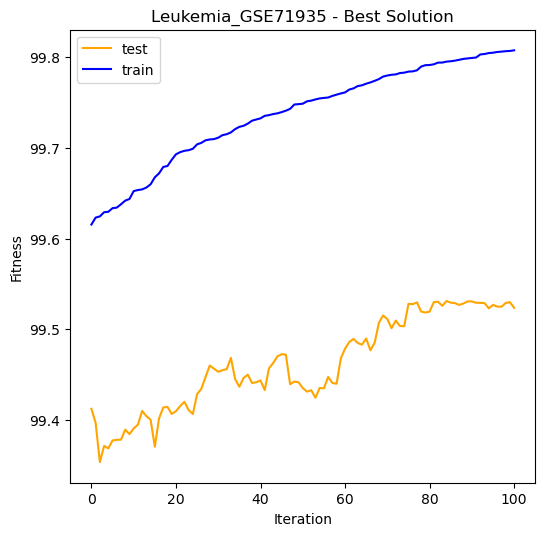

In [52]:
fig = plt.figure(figsize=(6,6), dpi= 100, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.set_title(f'{dataset} - Best Solution')
ax.set_xlabel('Iteration')
ax.set_ylabel('Fitness')

# for test in test_fit:
#     plt.plot(test[1:], color='navajowhite')

# for test in train_fit:
#     plt.plot(test[1:], color='lightblue')

plt.plot(np.mean(test_fit, axis=0), color='orange', label='test')
plt.plot(np.mean(train_fit, axis=0), color='b', label='train')

ax.legend()

print(f'Testing dataset fitness (mean): {test_fit[:,-1].mean():.4f}')
print(f'Testing dataset fitness (max): {test_fit[:,-1].max():.4f}')
print(f'Testing dataset fitness (min): {test_fit[:,-1].min():.4f}')

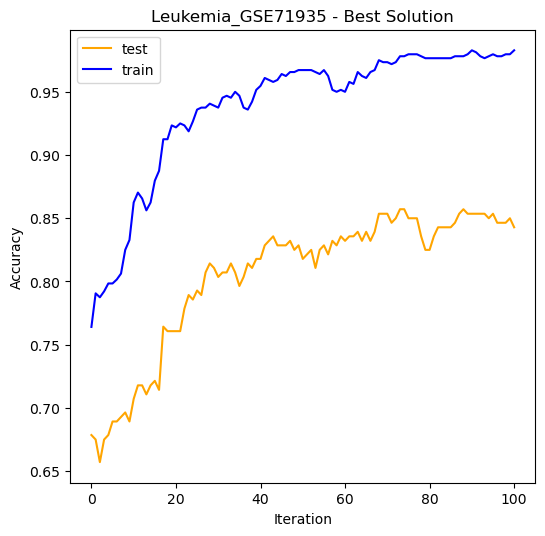

In [53]:
fig = plt.figure(figsize=(6,6), dpi= 100, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.set_title(f'{dataset} - Best Solution')
ax.set_xlabel('Iteration')
ax.set_ylabel('Accuracy')

# for test in test_acc:
#     plt.plot(test[1:], color='navajowhite')

# for test in train_acc:
#     plt.plot(test[1:], color='lightblue')

plt.plot(np.mean(test_acc, axis=0), color='orange', label='test')
plt.plot(np.mean(train_acc, axis=0), color='b', label='train')

ax.legend()

print(f'Testing dataset gmean (mean): {test_acc[:,-1].mean():.4f}')
print(f'Testing dataset gmean (max): {test_acc[:,-1].max():.4f}')
print(f'Testing dataset gmean (min): {test_acc[:,-1].min():.4f}')

Testing dataset gmean (mean): 0.6719
Testing dataset gmean (max): 1.0000
Testing dataset gmean (min): 0.0000


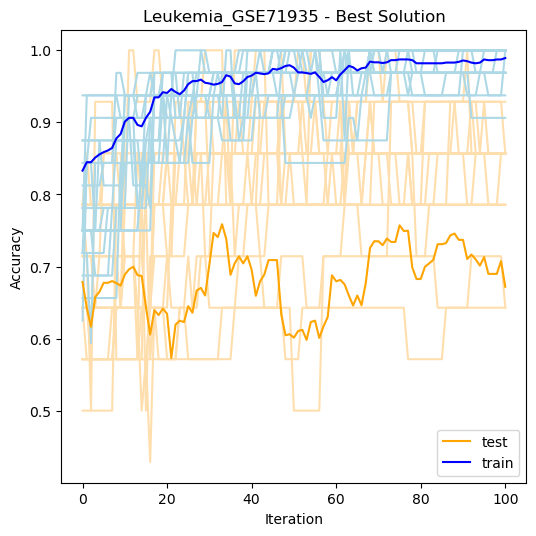

In [55]:
fig = plt.figure(figsize=(6,6), dpi= 100, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.set_title(f'{dataset} - Best Solution')
ax.set_xlabel('Iteration')
ax.set_ylabel('Accuracy')

for test in test_acc:
    plt.plot(test, color='navajowhite')

for test in train_acc:
    plt.plot(test, color='lightblue')

plt.plot(np.mean(test_gmean, axis=0), color='orange', label='test')
plt.plot(np.mean(train_gmean, axis=0), color='b', label='train')

ax.legend()

print(f'Testing dataset gmean (mean): {test_gmean[:,-1].mean():.4f}')
print(f'Testing dataset gmean (max): {test_gmean[:,-1].max():.4f}')
print(f'Testing dataset gmean (min): {test_gmean[:,-1].min():.4f}')

In [57]:
g_mean = np.zeros((n_tests, 1))
for i, model in enumerate(models):
	_, _, g_mean[i, 0] = model.evaluate(model.best_solution_test, model.x_test, model.y_test)

print(f'Best solution found for testing dataset')
print(f'Testing dataset gmean (mean): {g_mean.mean():.4f}')
print(f'Testing dataset gmean (max): {g_mean.max():.4f}')
print(f'Testing dataset gmean (min): {g_mean.min():.4f}')



Best solution found for testing dataset
Testing dataset gmean (mean): 0.6719
Testing dataset gmean (max): 1.0000
Testing dataset gmean (min): 0.0000
